# **Credit Card Fraud - Group 2 Report** 
 
## Statistics course - Data Science - uWaterloo
## Group members:
- Kristy Kwong
- Dimple Sachdev
- Rayna Ilieva
- Mohammad Tahsin
- Urooj Khaleeli
- Ronald Garcia









# **Data Preparation**

In [1]:
#Let's do some work together :-)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
#import pymc3 as pm
import matplotlib.lines as mlines
plt.style.use('ggplot')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/creditcard.csv"
df_original = pd.read_csv(path)

In [5]:
df_original.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print ("Fraud")
print (df_original.Time[df_original.Class == 1].describe())
print ()
print ("Normal")
print (df_original.Time[df_original.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


Except for the transaction and amount we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.

# **Analysis**

In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df_original.shape

(284807, 31)

In [9]:
# Let's check for Null values
df_original.isnull().sum().max()

0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


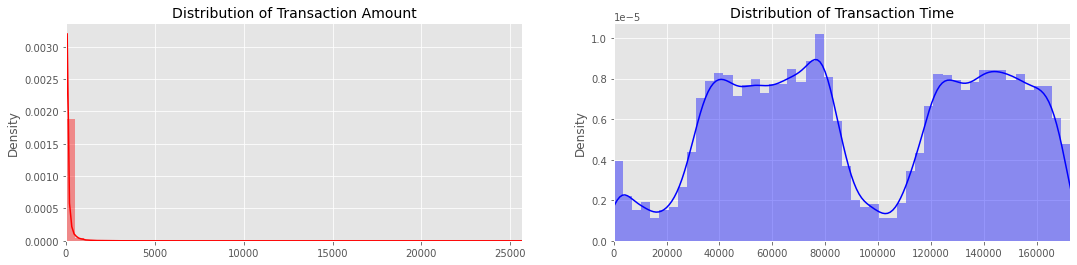

In [10]:
#visualizations of time and amount
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df_original['Amount'].values
time_val = df_original['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [11]:
#fraud vs. normal transactions 
print('No Frauds', round(df_original['Class'].value_counts()[0]/len(df_original) * 100,2), '% of the dataset')
print('Frauds', round(df_original['Class'].value_counts()[1]/len(df_original) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


0    284315
1       492
Name: Class, dtype: int64


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

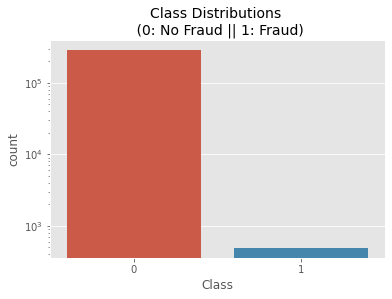

In [12]:
print(df_original.Class.value_counts())
ax=sns.countplot(x='Class',data=df_original);
ax.set_yscale('log')
ax.set_title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

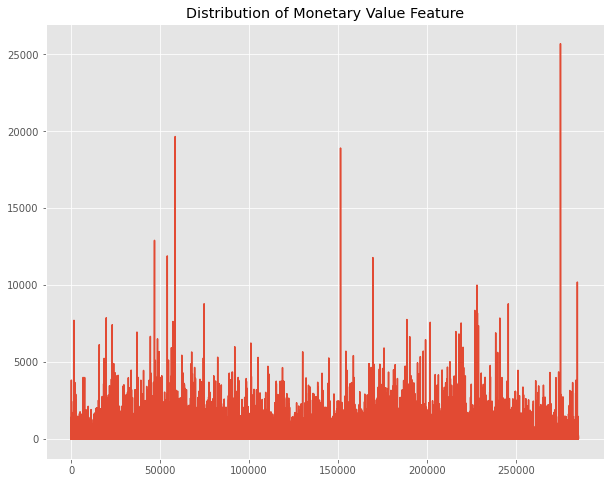

In [13]:
# The data set contains 284,807 transactions. 
# The mean value of all transactions is $88.35 while the largest transaction recorded in this data set amounts to $25,691.16. 
# However, as you might be guessing right now based on the mean and maximum, the distribution of the monetary value of all transactions is heavily right-skewed. 
# The vast majority of transactions are relatively small and only a tiny fraction of transactions comes even close to the maximum.

plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
plt.plot(df_original.Amount)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


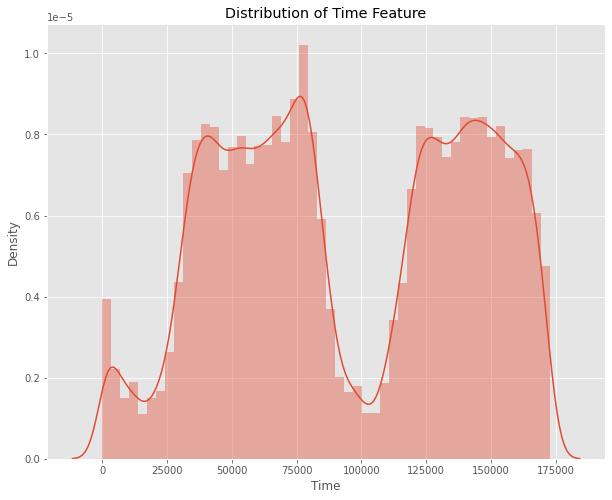

In [14]:
# The time is recorded in seconds since the first transaction is recorded. This means that the data is recorded over 2 days (172,800s)
# With the dip indicating night time - or switch from Day 1 to Day 2.

plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df_original.Time)

*Summary*


*   The transaction amount is relatively small. The mean of all the mounts made is approximately USD 88
*   Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (0.17%) of the time in the dataframe
*   There are no "Null" values
*   PCA Transformation: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount)
*   It is clear from the class distribution plot that our data is highly imbalanced. If we apply a classification algorithm, the algorithm learns well about the genuine cases because there are a lot of data points. As the fraudulent cases are too few, the algorithm does not learn much about them. So the final model can classify the genuine cases with perfection. But, it will predict a large number of fraudulent cases as genuine.



## Balancing the dataset

### Undersampling

In [15]:
## Need to balance the dataset before modeling
# We need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, 
# helping our models better understand patterns that determines whether a transaction is a fraud or not.
# There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
# We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

In [16]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df_New = df_original.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df_New.loc[df_New['Class'] == 1]
non_fraud_df = df_New.loc[df_New['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88047.013211,-2.386056,1.810324,-3.507679,2.265021,-1.547266,-0.725809,-2.785493,0.266249,-1.262384,-2.841080,1.934785,-3.116706,-0.051838,-3.474221,-0.055713,-2.053640,-3.331573,-1.123255,0.304430,0.171823,0.383012,0.002764,-0.017989,-0.078864,0.023893,0.035893,0.082914,0.046032,103.863364,0.500000
std,47734.855842,5.521442,3.706077,6.230966,3.180338,4.240055,1.759588,5.851363,4.902560,2.326487,4.534835,2.753690,4.600491,1.056703,4.672631,0.982919,3.490364,5.975691,2.414890,1.293817,1.121715,2.833865,1.188690,1.212338,0.561790,0.677821,0.486058,1.031145,0.514509,247.437349,0.500254
min,242.000000,-30.552380,-11.459237,-31.103685,-4.359562,-22.105532,-8.552368,-43.557242,-41.044261,-13.434066,-24.588262,-2.352280,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-8.684450,-22.797604,-8.887017,-19.254328,-2.363007,-4.781606,-1.372224,-7.263482,-2.921555,0.000000,0.000000
25%,47966.500000,-2.928833,-0.101209,-5.113334,-0.039925,-1.756143,-1.606447,-3.107826,-0.207695,-2.294075,-4.572043,-0.105390,-5.495221,-0.791884,-6.750005,-0.655151,-3.543426,-5.302111,-1.864846,-0.448872,-0.194754,-0.164706,-0.538842,-0.236014,-0.406439,-0.295745,-0.286746,-0.069398,-0.059305,1.515000,0.000000
50%,80931.500000,-0.748954,0.917769,-1.432100,1.219024,-0.422289,-0.668805,-0.590980,0.148454,-0.667302,-0.867831,1.168480,-0.812364,-0.034208,-0.969097,-0.019416,-0.674492,-0.514511,-0.343753,0.159319,0.031723,0.159352,-0.006348,-0.023527,-0.009729,0.052244,-0.006489,0.046272,0.035311,17.520000,0.500000
75%,133555.250000,1.077190,2.854548,0.431914,4.229802,0.460232,0.069439,0.258925,0.834372,0.173420,-0.018454,3.586130,0.195330,0.678011,0.156061,0.637733,0.311816,0.183956,0.334927,0.953828,0.453060,0.648533,0.589865,0.201764,0.347247,0.393322,0.355261,0.452269,0.220976,99.990000,1.000000
max,172399.000000,2.315010,22.057729,3.072478,12.114672,11.095089,9.339674,5.802537,20.007208,6.093058,8.487950,12.018913,2.493793,3.125646,3.442422,2.781961,3.139656,6.739384,3.864228,5.228342,11.059004,27.202839,8.361985,5.466230,1.176541,2.208209,2.745261,3.491147,8.440910,3000.000000,1.000000


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


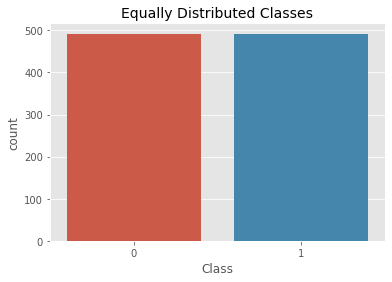

In [17]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Without balancing the dataset, the model will be biased towards the majority class. We will need to create balanced data our of the imbalanced dataset. 

Sampling is a good approach to deal with our imbalanced data. We can change the dataset in such a way that the model gets balanced data as input. There are two types of sampling - undersampling and oversampling.

Our choosen method for creating a balanced data from imbalanced data is undersampling. Undersampling resamples the majority class points in the data to make them equal to the minority class points.

One of the disadvantage of undersampling is that we can loose relevant information.

## Correlation Matrices - essence of understanding our data


In [18]:
# We want to know if there are variables that influence heavily in whether a specific transaction is a fraud. 
# However, it is important that we use the correct dataframe (subsample) in order for us to see 
# which features have a high positive or negative correlation with regards to fraud transactions.

# Summary and Explanation:
# Negative Correlations: V17, V14, V12 and V10 are negatively correlated. 
#    Notice how the lower these values are, the more likely the end result will be a fraud transaction.
# Positive Correlations: V2, V4, V11, and V19 are positively correlated. 
#     Notice how the higher these values are, the more likely the end result will be a fraud transaction.

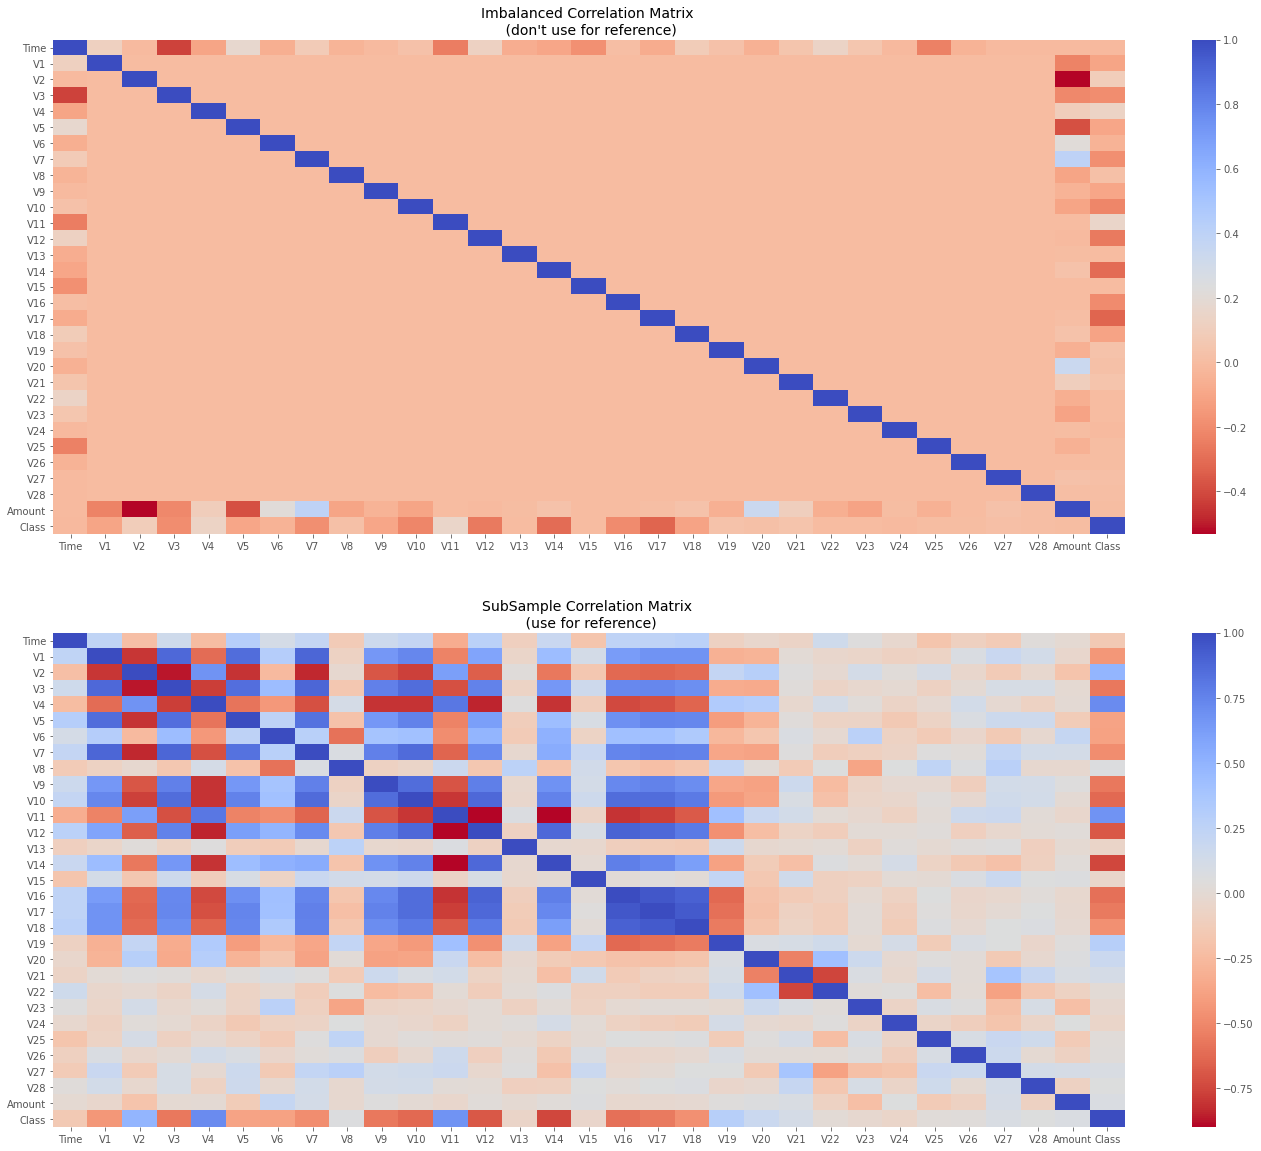

In [19]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df_original.corr(method = 'pearson')
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr(method = 'pearson')
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

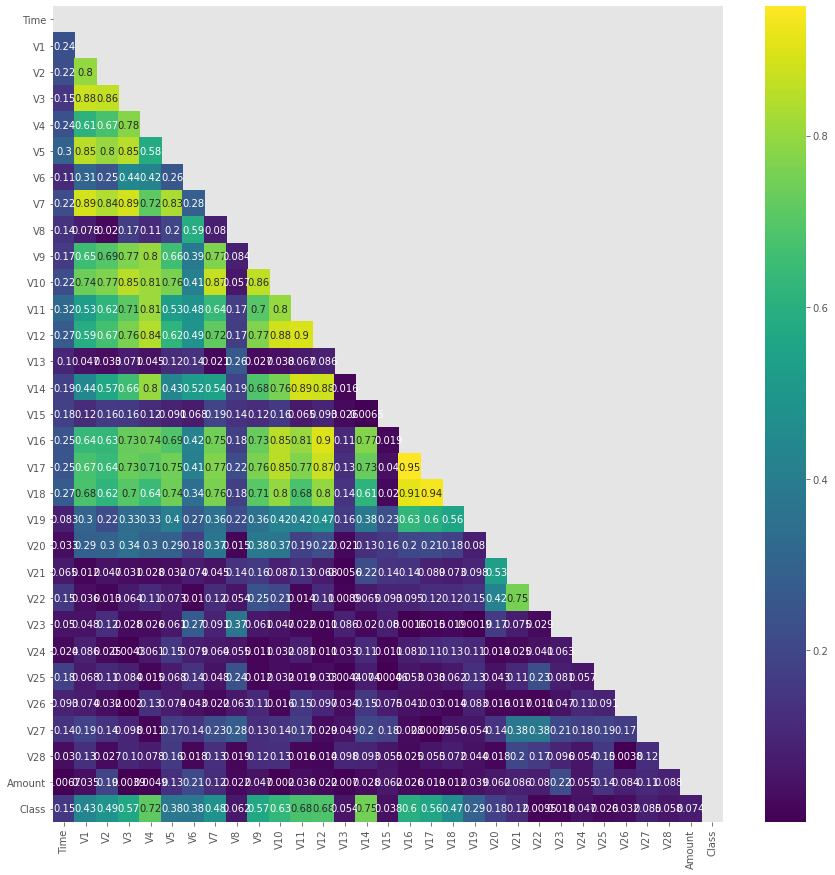

In [20]:
plt.figure(figsize=(15, 15))
corr = new_df.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap='viridis');

## Outlier Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


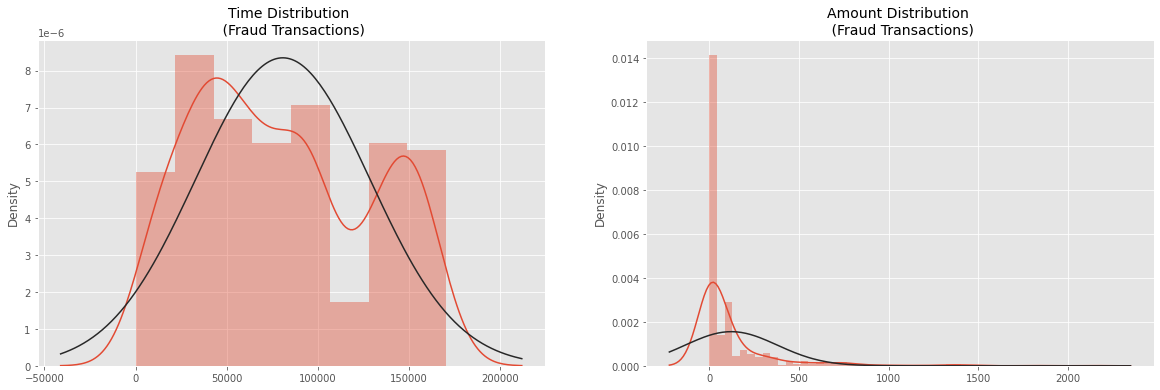

In [21]:
from scipy.stats import norm

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))

Time_fraud_dist = new_df['Time'].loc[new_df['Class'] == 1].values
sns.distplot(Time_fraud_dist,ax=ax1, fit=norm)
ax1.set_title('Time Distribution \n (Fraud Transactions)', fontsize=14)

Amount_fraud_dist = new_df['Amount'].loc[new_df['Class'] == 1].values
sns.distplot(Amount_fraud_dist,ax=ax2, fit=norm)
ax2.set_title('Amount Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

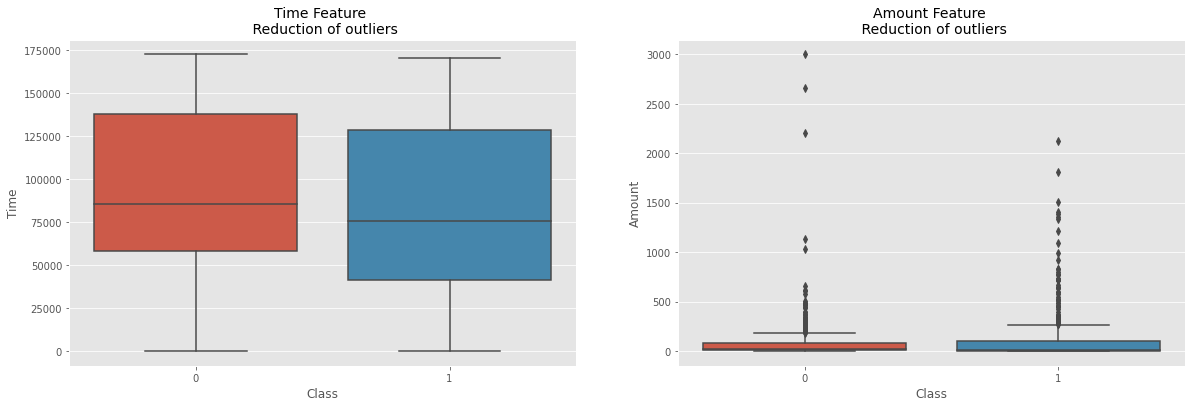

In [22]:
f,(ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

# Boxplots with outliers removed
# Feature Time
sns.boxplot(x="Class", y="Time", data=new_df,ax=ax1)
ax1.set_title("Time Feature \n Reduction of outliers", fontsize=14)
# ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
#            arrowprops=dict(facecolor='black'),
#            fontsize=14)

# Feature Amount
sns.boxplot(x="Class", y="Amount", data=new_df, ax=ax2)
ax2.set_title("Amount Feature \n Reduction of outliers", fontsize=14)
# ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
#           arrowprops=dict(facecolor='black'),
#            fontsize=14)

plt.show()

# Models

## Generalized linear model (GLM)

In [23]:
!pip install arviz

     |████████████████████████████████| 1.5MB 4.3MB/s 
     |████████████████████████████████| 4.3MB 30.2MB/s 
     |████████████████████████████████| 737kB 44.1MB/s 
     |████████████████████████████████| 296kB 45.7MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1


In [24]:
import arviz as az

In [25]:
#!pip install pymc3>=3.8
!pip install -U pymc3

     |████████████████████████████████| 1.9MB 4.8MB/s 
     |████████████████████████████████| 2.8MB 22.9MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=f51175c0238e42911deb8573b83119c1db3a96f847f09719dabe5ed9a367fb0c
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
  Created wheel for theano-pymc: filename=Theano_PyMC-1.0.11-cp36-none-any.whl size=2572023 sha256=326bf10dd3ea9b2d63ef595646d4a3ca17d5ea0a55bc0385035705549480218f
  Stored in directory: /root/.cache/pip/wheels/26/b2/77/4ee2bb9b1c1de7de771254a5e379d898273d8114237b0df686
Successfully built contextvars theano-pymc
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [26]:
import pymc3 as pm

In [27]:
timedata = new_df.Time
amtdata = new_df.Amount

In [28]:
y_simple = new_df['Class']
x_n = 'Amount' 
x_0 = new_df[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_simple:
    α = pm.Normal('α', mu=amtdata.mean(), sd=amtdata.std())
    β = pm.Normal('β', mu=amtdata.mean(), sd=amtdata.std())
    
    μ = α + pm.math.dot(x_c, β)    
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    
    y_1 = pm.Bernoulli('y_1', p=θ, observed=y_simple)

    trace_simple = pm.sample(980, tune=980)

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]


Sampling 2 chains for 980 tune and 980 draw iterations (1_960 + 1_960 draws total) took 28 seconds.


/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  ("hpd will be deprecated " "Please replace hdi"),


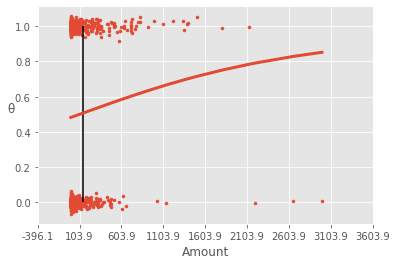

In [29]:
theta = trace_simple ['θ']. mean (axis = 0)
idx = np.argsort (x_c)
plt.plot (x_c [idx], theta [idx], lw = 3)
plt.vlines (trace_simple ['bd']. mean (), 0, 1)
bd_hpd = az.hpd (trace_simple ['bd'])
#plt.fill_betweenx ([0, 1], bd_hpd [0], bd_hpd [1], alpha = 0.5)

plt.scatter (x_c, np.random.normal (y_simple, 0.02),
            marker = '.')
#az.plot_hpd (x_c, trace_simple ['θ'])

plt.xlabel (x_n)
plt.ylabel ('θ', rotation = 0)
locs, _ = plt.xticks ()
plt.xticks (locs, np.round (locs + x_0.mean(), 1));

The above plot showsFraud vs No Fraud (y = 0, y = 1). The Kinked (Blue) line is the mean value of θ. This line can be interpreted as the probability of fraud, given that we know that the Amount.The boundary decision is represented as a (black) vertical line. According to the boundary decision, the values of Amount to the left correspond to y = 0 (Not Fraudulent), and the values to the right to y = 1 (Fraudulent).

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, V28, V27, V26, V25, V24, V23, V22, V21, V20, V19, V18, V16, V15, V14, V13, V12, V11, V10, V9, V8, V7, V6, V5, V4, V3, V2, V1, Amount, Time, Intercept]


Sampling 2 chains for 950 tune and 950 draw iterations (1_900 + 1_900 draws total) took 127 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/arviz/plots/traceplot.py:195: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (31), generating only 20 plots
  UserWarning,


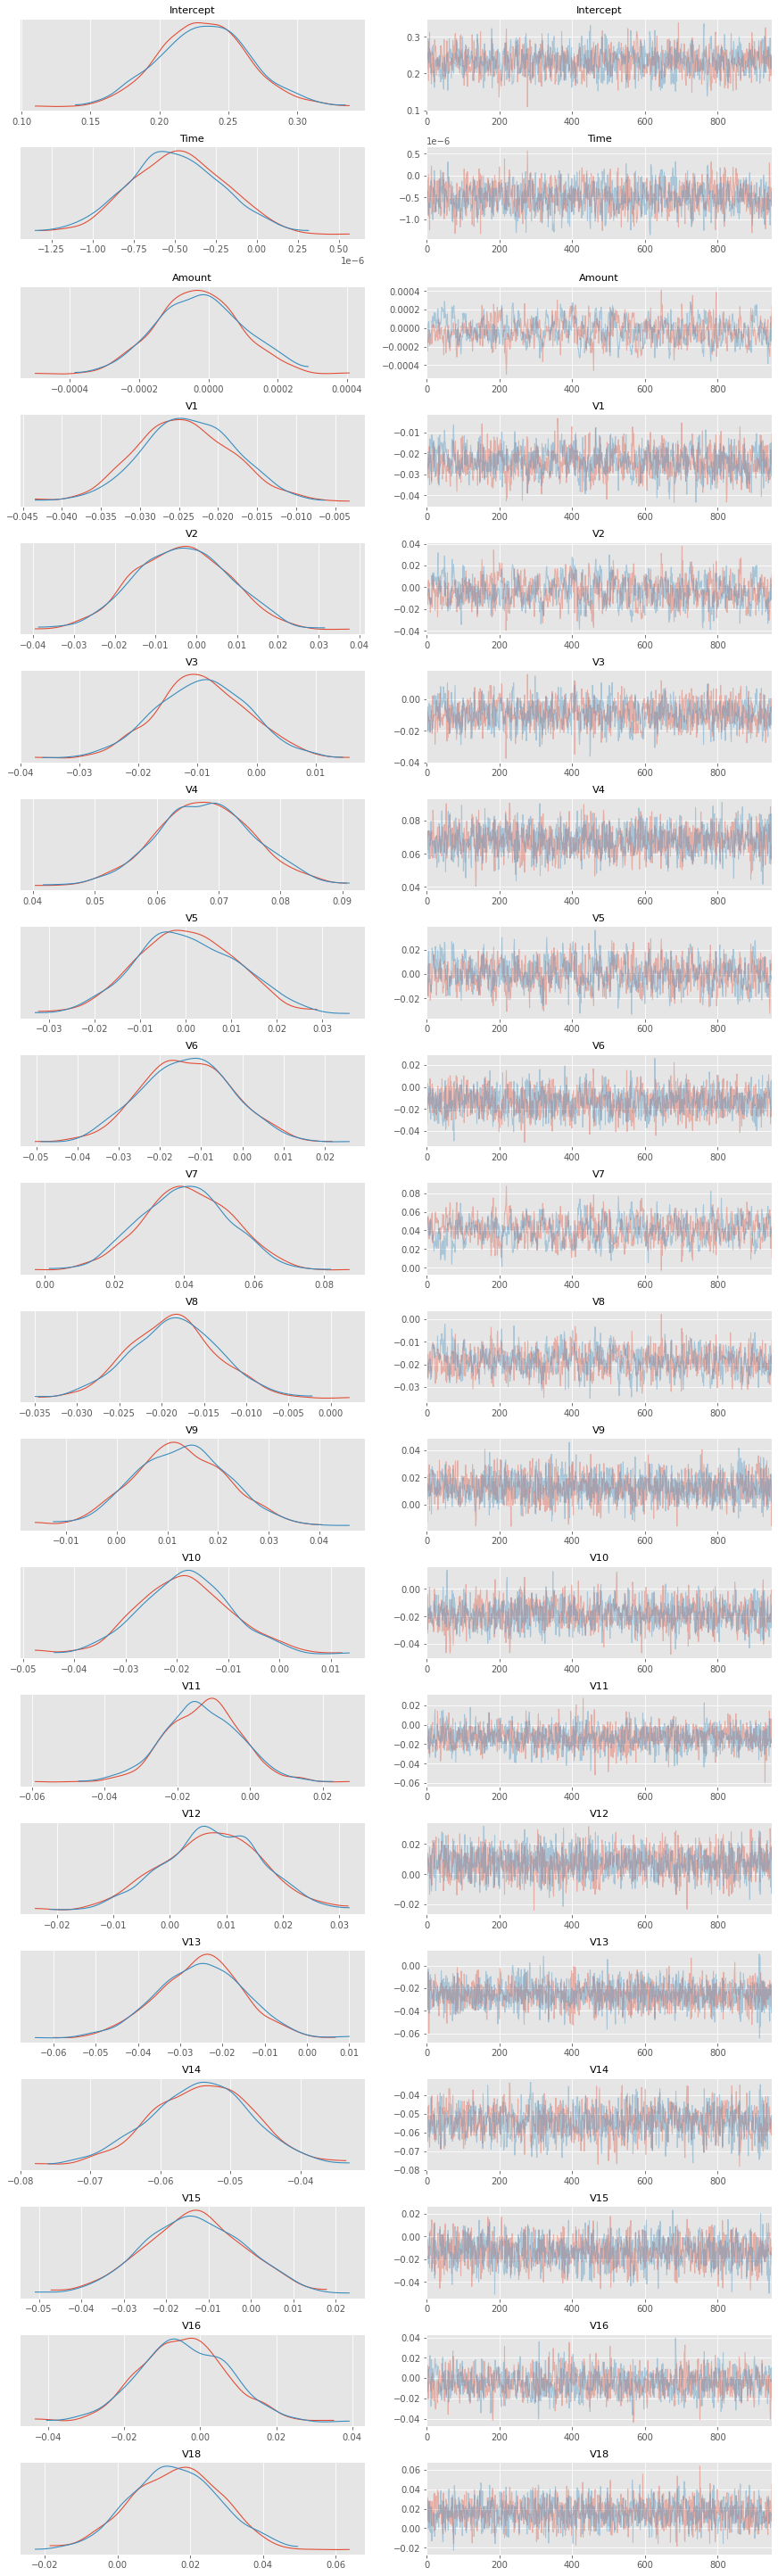

In [30]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('Class ~ Time + Amount + V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V18 + V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28', new_df)
    trace = pm.sample(950, tune = 950, init = 'adapt_diag')
    
az.plot_trace(trace);

the amount effect takes place because a transaction with a higher amount has at least 1.0001377 higher probability to be fraudulent

In [33]:
stat_df = pm.summary(trace)
stat_df['odds_ratio'] = np.exp(stat_df['mean'])
stat_df['percentage_effect'] = 100 * (stat_df['odds_ratio'] - 1)
stat_df[['odds_ratio','percentage_effect']]

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,odds_ratio,percentage_effect
Intercept,1.261120,26.111973
Time,1.000000,0.000000
Amount,1.000000,0.000000
V1,0.976286,-2.371429
V2,0.997004,-0.299550
V3,0.991040,-0.895962
V4,1.070365,7.036531
V5,1.000000,0.000000
V6,0.987084,-1.291586
V7,1.041852,4.185211


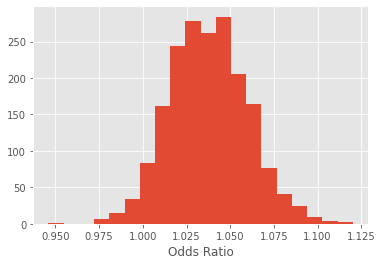

P(0.9964377 < Odds Ratio < 1.0832675) = 0.95


In [35]:
b = trace['V28']
plt.hist(np.exp(b), bins=20)
plt.xlabel("Odds Ratio")
plt.show();
lb, ub = np.percentile(b, 2.5), np.percentile(b, 97.5)
print("P(%.7f < Odds Ratio < %.7f) = 0.95" % (np.exp(lb), np.exp(ub)))

with a one standard deviation increase in V28, the odds of Fraud increases by 3.7%. Similarly, for a one unit increase in V26, the odds of Fraud decreases by -6.7%. holding all other independent variables constant.

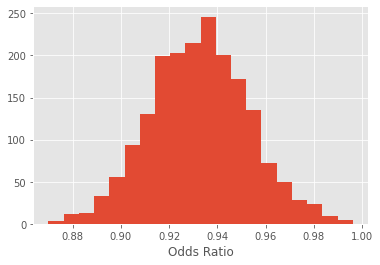

P(0.8930780 < Odds Ratio < 0.9750123) = 0.95


In [36]:
b = trace['V26']
plt.hist(np.exp(b), bins=20)
plt.xlabel("Odds Ratio")
plt.show();
lb, ub = np.percentile(b, 2.5), np.percentile(b, 97.5)
print("P(%.7f < Odds Ratio < %.7f) = 0.95" % (np.exp(lb), np.exp(ub)))

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


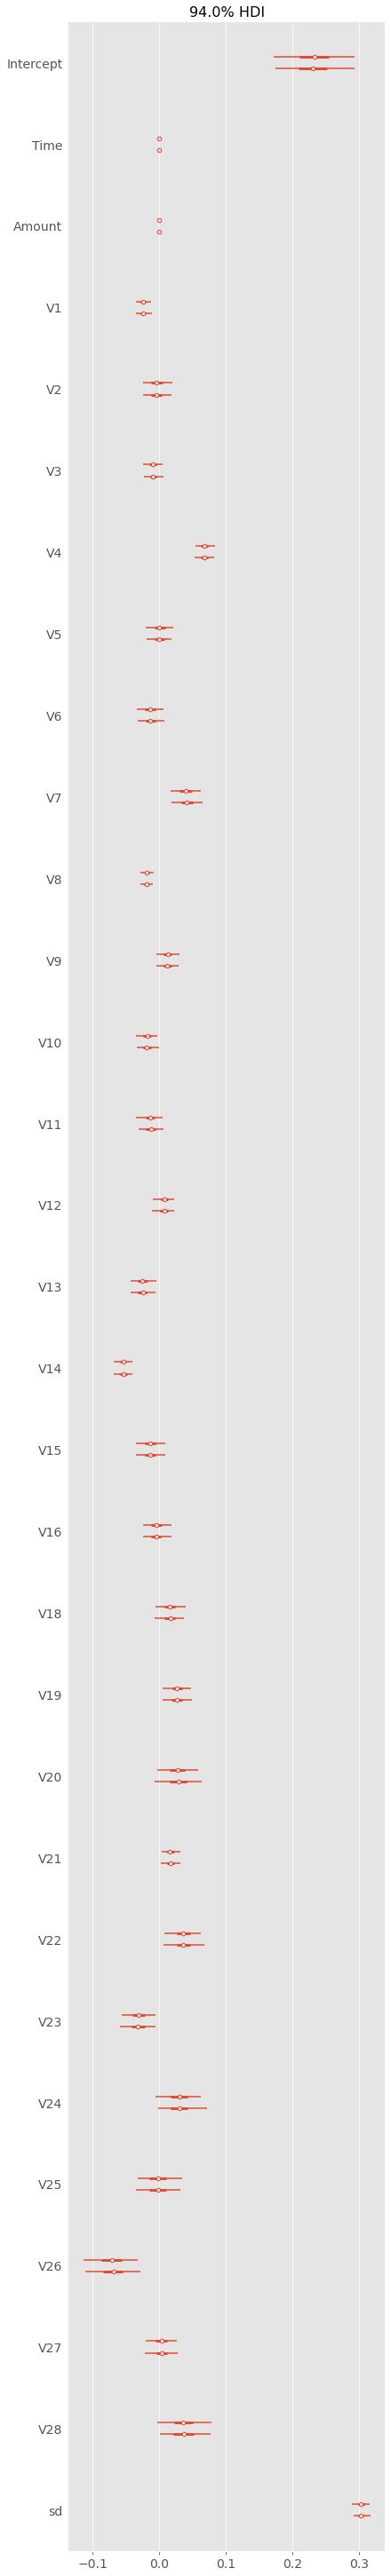

In [37]:
az.plot_forest(trace);

There's a baseline probability of fraud. Beyond that, V26 and V28 have the largest contribution to fraud.

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


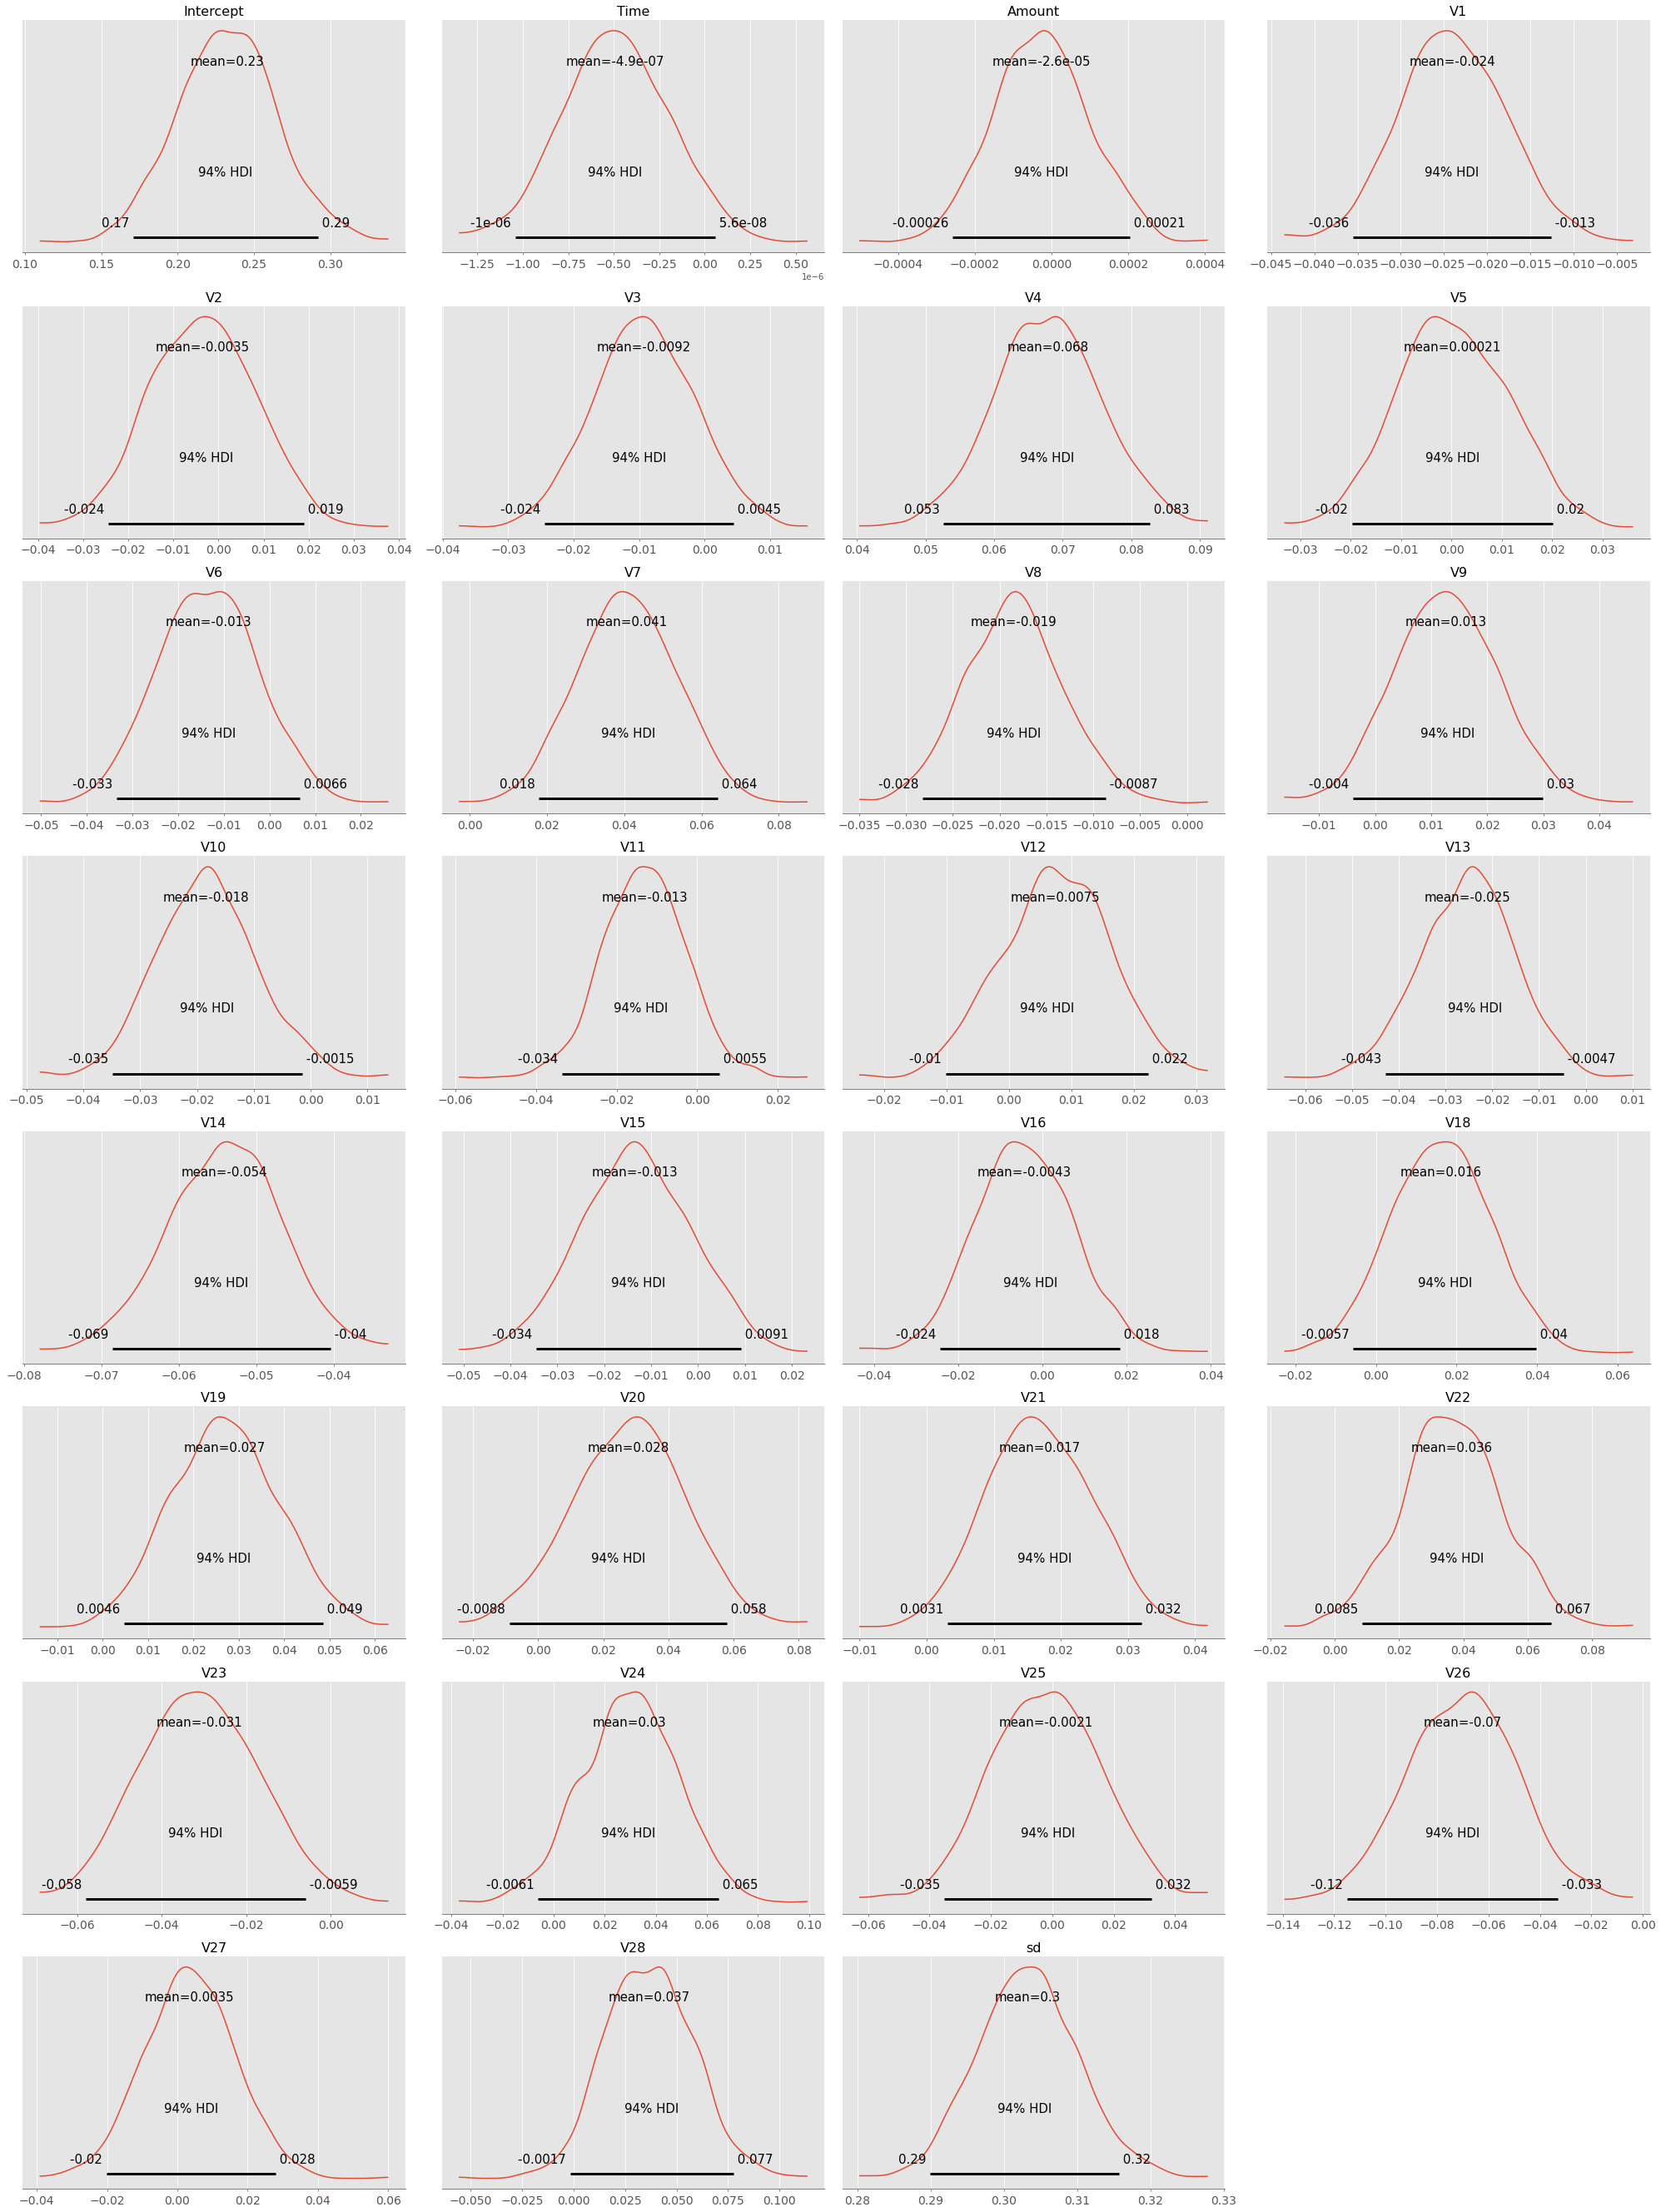

In [38]:
pm.plot_posterior(trace);

In [42]:
def lm_full(trace, Amount,Time):
    shape = np.broadcast(Amount,Time).shape
    x_norm = np.asarray([np.broadcast_to(x, shape) for x in [Amount,Time]])
    
    return 1 / (1 + np.exp(-(trace['Intercept'] + 
                             trace['Amount']*x_norm[0] + 
                             trace['Time']*x_norm[1])))

lm = lambda x, samples: lm_full(samples, x, 1.)
lm2 = lambda x, samples: lm_full(samples, x, 5.)

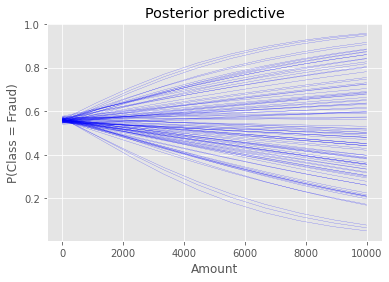

In [43]:
pm.plot_posterior_predictive_glm(trace, eval=np.linspace(0,10000,10), lm=lm, samples=100, color='blue', alpha=.8)

blue_line = plt.Line2D(['lm'], [], color='b', label='Amt')

plt.ylabel("P(Class = Fraud)")
plt.xlabel("Amount")
plt.show();

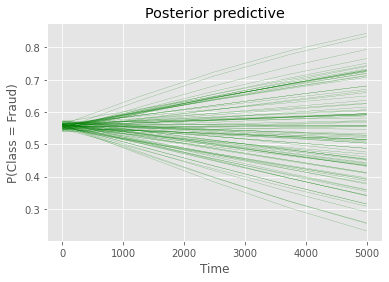

In [44]:
pm.plot_posterior_predictive_glm(trace, eval=np.linspace(0,5000,5), lm=lm2, samples=100, color='green', alpha=.8)
green_line = plt.Line2D(['lm2'], [], color='g', label='Time') 
plt.ylabel("P(Class = Fraud)")
plt.xlabel("Time")
plt.show();

In [46]:
def plot_confusion_matrix(cm, classes = ['Genuine', 'Fraud'],
                          title='Fraud Confusion matrix',
                          cmap=plt.cm.Reds):
    
    # Display the matrix in text form
    print('Confusion matrix')
    print(cm)
    figsize(8, 8)
    
    # Show the matrix using the imshow functionality
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20)
    
    # Tick marks show classes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, rotation = 90, size = 12)

    # Formatting for text labels on plot
    fmt1 = 's'
    fmt2 = 'd'
    thresh = cm.max() / 2.
    
    # Four types of classifications
    types = [['True Negative', 'False Positive'],
             ['False Negative', 'True Positive']]
    
    # Add the actual numbers and the types onto the heatmap plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i - 0.05, format(types[i][j], fmt1),
                 horizontalalignment="center", size = 18,
                 color="white" if cm[i, j] > thresh else "black")
        
        plt.text(j, i + 0.15, format(cm[i, j], fmt2),
                 horizontalalignment="center", size = 24,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size = 16)
    plt.xlabel('Predicted Label', size = 16)

In [48]:
ppc = pm.sample_posterior_predictive(trace, model=logistic_model, samples=500)
ppc['y'].mean(axis=0)
preds = np.rint(ppc['y'].mean(axis=0)).astype('int')
preds = np.where(preds==2, 1, preds) 

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


Confusion matrix
[[483   9]
 [ 72 420]]


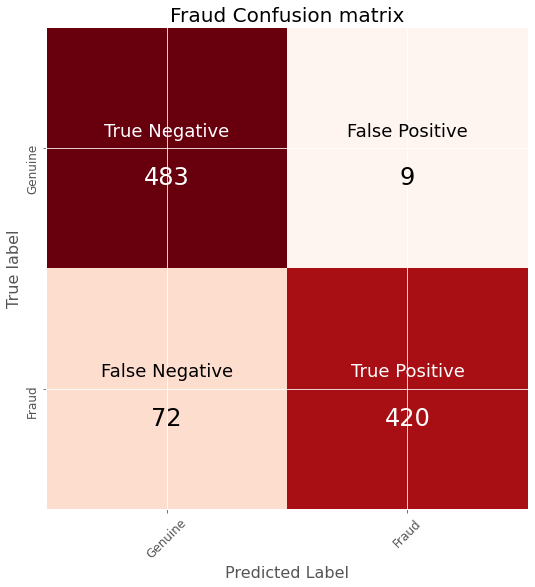

In [50]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import itertools
from IPython.core.pylabtools import figsize
cm = confusion_matrix(new_df['Class'], preds)
cm
plot_confusion_matrix(cm)

## Logistic Regression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


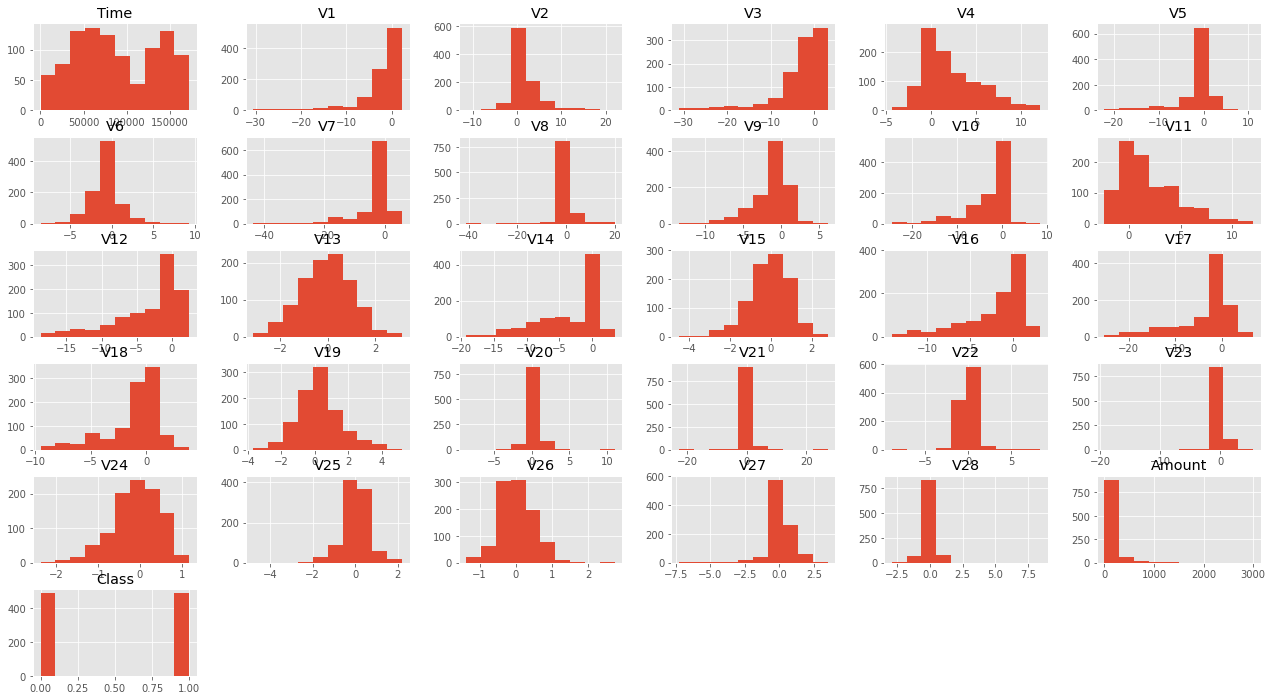

In [51]:
# And some function we will need
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

new_df.hist(figsize=(22,12))
plt.show()

# Class is ordinal variable. 
# Here, we will convert to set of dummies which will then be used as a predictors in our logistic regression model.

In [52]:
dummy_class = pd.get_dummies(new_df['Class'], prefix='Class')
new_df = new_df.join(dummy_class)

In [53]:
# Fit the model
# predictors = ['Amount', 'Time','V10','V17', 'V14', 'V12']
# predictors = ['Amount', 'Time','V2', 'V4', 'V11','V19', 'V20', 'V21' ]
predictors = ['Amount', 'Time','V10', 'V14', 'V12','V2', 'V4', 'V11', 'V19' ]
m = Logit(new_df['Class'], new_df[predictors])
m = m.fit()

Optimization terminated successfully.
         Current function value: 0.202547
         Iterations 10


In [54]:
m.params

Amount   -0.000130
Time     -0.000025
V10      -0.243075
V14      -0.875876
V12      -0.512011
V2       -0.123025
V4        0.640669
V11      -0.100088
V19       0.201388
dtype: float64

In [55]:
print(m.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.708      
Dependent Variable: Class            AIC:              416.6125   
Date:               2020-12-14 05:52 BIC:              460.6371   
No. Observations:   984              Log-Likelihood:   -199.31    
Df Model:           8                LL-Null:          -682.06    
Df Residuals:       975              LLR p-value:      4.1668e-203
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
Amount    -0.0001     0.0006    -0.2315   0.8169   -0.0012    0.0010
Time      -0.0000     0.0000   -12.2677   0.0000   -0.0000   -0.0000
V10       -0.2431     0.1276    -1.9046   0.0568   -0.4932    0.0071
V14      

In [56]:
# Derive estimates for the odds.
new_df.loc[:, 'p'] = m.predict(new_df[predictors])

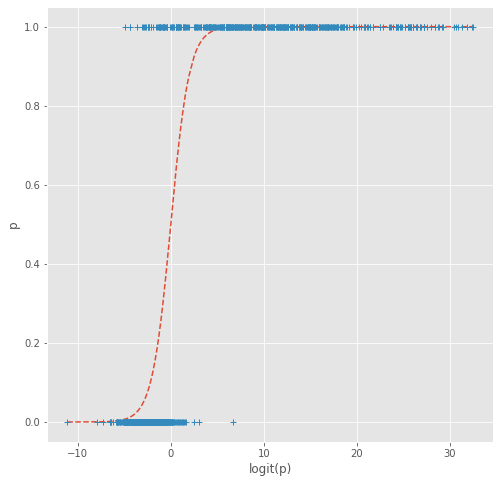

In [57]:
# Plot the relationship between the values of logit(p) and odds (p) along the actual values of the response (Class).

new_df = new_df.sort_values(by = ['p'], axis = 0)
plt.plot(logit(new_df.p), new_df.p, '--')
plt.plot(logit(new_df.p), new_df.Class, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')
plt.show()

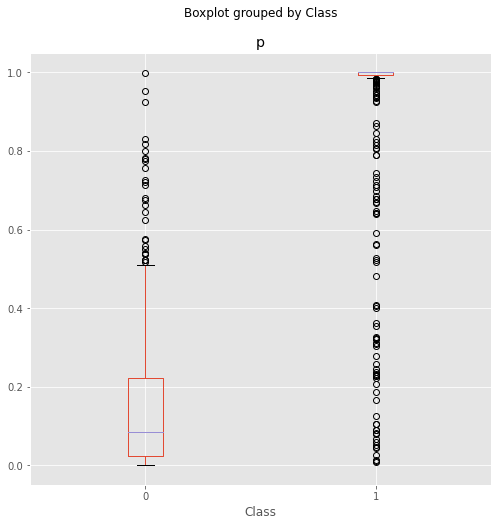

In [58]:
# plot the boxplot to see the distribution of the estimated odds for the both value of the actual response.

new_df.boxplot(column='p', by = 'Class')
plt.show()

In [59]:
new_df.loc[:, 'yhat'] = (new_df.p > 0.5) * 1
new_df.yhat.value_counts()

0    502
1    482
Name: yhat, dtype: int64

In [60]:
# Now we can create was is called a confusion matrix to see how well our estimates match the actual values.
#pd.crosstab(new_df.Class, new_df.yhat)

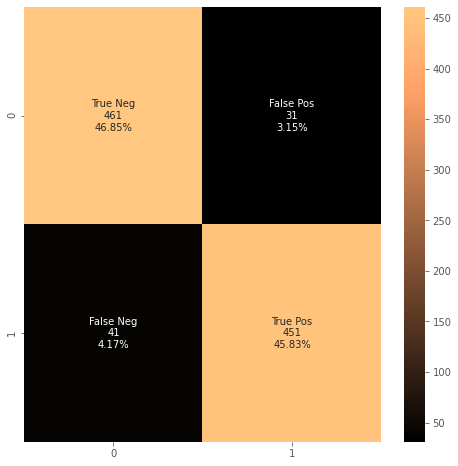

In [63]:
log_reg_cf = confusion_matrix(new_df.Class, new_df.yhat)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0}'.format(value) for value in
                log_reg_cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     log_reg_cf.flatten()/np.sum(log_reg_cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(log_reg_cf, annot=labels, fmt='', cmap=plt.cm.copper)


### Explanation of results of Confusion Matrix

* In the confusion matrix above which used, the following as predictors: 'Amount', 'Time','V10','V17', 'V14', 'V12'; we see that we have 461 cases when a transaction was correctly estimated to be non-fraudulent and 451 cases when a transation was correctly estimated to be fraudulent.
* The remaining 31 + 41 estimates were incorrectly assigned. 41 were transactions were falsely identified to be fraudulent and 31 transactions were falsely identified as non-fraudulent.

In [64]:
print(m.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.708      
Dependent Variable: Class            AIC:              416.6125   
Date:               2020-12-14 05:56 BIC:              460.6371   
No. Observations:   984              Log-Likelihood:   -199.31    
Df Model:           8                LL-Null:          -682.06    
Df Residuals:       975              LLR p-value:      4.1668e-203
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
Amount    -0.0001     0.0006    -0.2315   0.8169   -0.0012    0.0010
Time      -0.0000     0.0000   -12.2677   0.0000   -0.0000   -0.0000
V10       -0.2431     0.1276    -1.9046   0.0568   -0.4932    0.0071
V14      

Observations from Logit analysis above: 
- converged = 1.0000 --> the regression analysis was successful
- iterations = 10.000 --> the algorithm took 10 iterations to find the solution
- Pseudo R-squared: 0.708 --> assessment of the model's quality 

Further from below we see:
- Accuracy of the model is 93% and positive predictive value is 94% with a true positive rate of 0.92%
- So for response of Class, predictors Time, Amount, 'V10', 'V14', 'V12','V2', 'V4', 'V11', 'V19' appear to have an important contribution to the success of this model.
- With our case here, our model's prediction for fraudulence using the Mathews Correlation Coefficient (MCC) metric is quite good at 85%.
- We also see that having a Youden's J value of 0.86 indicates a high probability of an informed decision about the classifier (i.e. Class)

In [69]:
conf_mat = m.pred_table()

tn, fp, fn, tp = conf_mat.flatten()
print (tn, fp, fn, tp)

461.0 31.0 41.0 451.0


In [70]:
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model is: %1.2f" % acc)

Accuraccy of the model is: 0.93


In [78]:
# For binary classification, there is another (and arguably more elegant) solution: 
# treat the true class and the predicted class as two (binary) variables, and compute their correlation coefficient 
# (in a similar way to computing correlation coefficient between any two variables). 
# The higher the correlation between true and predicted values, the better the prediction.
# This is the Mathews Correlation Coefficient (MCC).
# With our case here, our model's prediction for fraudulence is quite good at 83%.

mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)

Mathews correlation coefficient between the estimates and the true response is: 0.83


In [72]:
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision - positive predictive value- is %1.2f and it's recall - True Positive Rate - is %1.2f" % (prc, rec))

Model's precision - positive predictive value- is 0.94 and it's recall - True Positive Rate - is 0.92


In [73]:
# Set discrimination thresholds
ths = np.arange(0., 1.0, 0.025)

# Containers
sensitivity = []
specificity = []
accuracy = []
matthews = []

# Main loop
for th in ths:
    # Generate estimates
    conf_mat = m.pred_table(threshold=th)
    
    # Extract TN, FP, ...
    tn, fp, fn, tp = conf_mat.flatten()
    
    # Calculate sensitivity and specificity
    sens = (1. * tp) / (tp + fn)
    spec = (1. * tn) / (tn + fp)    
    
    # Calculate ACC and MCC
    acc = (tp + tn) / np.sum(conf_mat)
    mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))    

    # Add to containers
    sensitivity.append(sens)
    specificity.append(spec)
    accuracy.append(acc)
    matthews.append(mcc)

In [74]:
# Bind all the numbers together
roc = pd.DataFrame({'discret_thr' : ths, 
                    'sensitivity' : sensitivity, 
                    'specificity' : specificity,
                    '_specificity' : [1 - x for x in specificity],
                    'accuracy' : accuracy, 
                    'matthews' : matthews})

# Sort by 1 - specificity so we can plot it easily
roc = roc.sort_values(by = "_specificity")

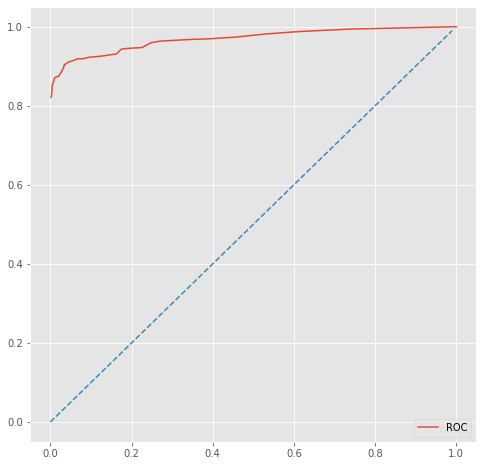

In [75]:
# Let's plot the ROC curve now.  
# To note that the further away ROC curve from the diagonal is (the closest it is to the top left corner), 
# better the classifier is.

plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')
plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.legend(loc = 4)

In [76]:
# Area under the curve - denotes the overall performance of the classifier.
# The higher the value of AUC, the better is the overall performance of the classifier.

auc = np.trapz(y = roc.sensitivity, x = roc._specificity)
print ("Area under ROC curve = %1.2f" % auc)

Area under ROC curve = 0.97


In [79]:
# Where threshold equal 0.5
idx_default_th = np.where(roc.discret_thr == 0.5)[0][0]

# Max sum of spec and sens
idx_youdensj = np.argmax(roc.sensitivity + roc.specificity)

 # Balanced spec and sens
idx_balance = np.argmin(np.abs(roc.sensitivity - roc.specificity))

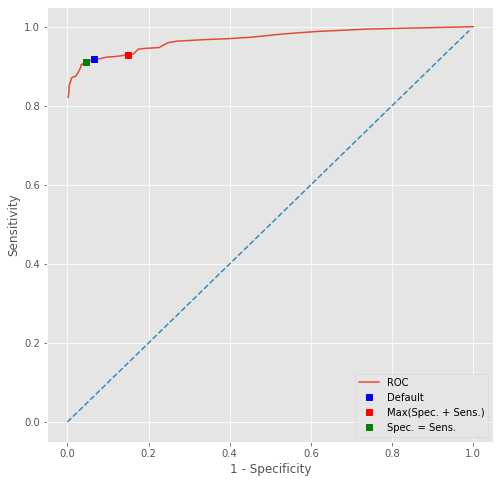

In [80]:
plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')

plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.plot(roc._specificity[idx_default_th], 
         roc.sensitivity[idx_default_th], 
         's', color = 'blue',
         label = 'Default')

plt.plot(roc._specificity[idx_youdensj], 
         roc.sensitivity[idx_youdensj], 
         's', color = 'red',
         label = 'Max(Spec. + Sens.)')

plt.plot(roc._specificity[idx_balance], 
         roc.sensitivity[idx_balance], 
         's', color = 'green', 
         label = 'Spec. = Sens.')


plt.legend(loc = 4)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [81]:
m.pred_table(threshold=roc.discret_thr[idx_youdensj])

array([[419.,  73.],
       [ 35., 457.]])

In [82]:
m.pred_table(threshold=roc.discret_thr[idx_balance])

array([[470.,  22.],
       [ 44., 448.]])

In [83]:
J = max(roc.sensitivity + roc.specificity - 1)
print ('Youden\'s J = %1.2f' % J)

Youden's J = 0.87


Youden's J is the likelihood of a positive identification of credit card fraud result versus non-fraudulent.
It is also the probability of an informed decision (as opposed to a random guess).
The vertical distance of the ROC curve from the no discrimination line gives a measure of ‘INFORMEDNESS’. 
This is known as Youden’s J satistic. This statistics can take values between 0 and 1.
Having a value of 0.86 indicates the probability of an informed decision about the classifier (i.e. Class).

Final analysis shows that the test model with predictors: 'Amount', 'Time','V10', 'V14', 'V12','V2', 'V4', 'V11', 'V19', provide a really good indication of a transaction being classified as fraudulent vs. not.  